# Logistic Regression

### Problem statement: Predicting a student's chances of getting admission based on admission scores.

In [162]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data = np.loadtxt('scores.txt', delimiter=',')
m = len(data) #Number of training examples
#Slicing training set and test set
Xj = data[:95, :2].reshape(m-5, 2)
test_x = data[95:100, :2].reshape(5, 2)
y = data[:95, 2].reshape(m-5, 1)
test_y = data[95:100, 2].reshape(5, 1)

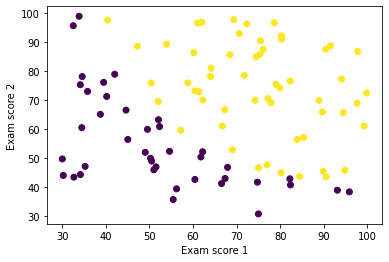

In [163]:
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')
plt.scatter(Xj[:, 0], Xj[:, 1], c = (y==1))
#The yellow circles marks all students whose score configuration gave them admission into the university.

In [164]:
#Defining the sigmoid function
e = 2.718281828459045
def sigmoid(a):
    return 1/(1+e**(-a))
print(sigmoid(100), sigmoid(-100), sigmoid(0)) #We observe sigmoid function's behaviour

1.0 3.7200759760208555e-44 0.5


In [165]:
X0 = np.ones(len(Xj), dtype = float).reshape(len(Xj), 1) #creating the X0 rows on 1s
X = np.append(X0, Xj, axis=1).reshape(len(Xj), 3) #Creating the final X features array
theta = np.zeros((3, 1)) #Initialising all theta values to zero

In [166]:
#Creating the cost function
def computeCost(X, y, theta):
    J = (-1/m)*((y.transpose() @ np.log10(sigmoid(X @ theta))) + ((1-y).transpose() @ np.log10(sigmoid(1-(X @ theta)))))
    return J[0][0];
print('For theta initialised to zeros the cost is:', computeCost(X, y, theta))

For theta initialised to zeros the cost is: 0.21998562652753564


In [167]:
#Creating the gradient descent function
alpha = 0.0001
iterations = 2000 #We will run our gradient descent for these iterations

def gradientDescent(X, y, theta, alpha, iterations, m):
    J_history = np.zeros(iterations).reshape(iterations, 1)
    for iter in range(iterations):
        theta = theta - ((alpha/m)*(X.transpose() @ ((X @ theta)-y)))
        J_history[iter] = computeCost(X, y, theta)
    return [theta, J_history]

returned = gradientDescent(X, y, theta, alpha, iterations, m)
theta = returned[0]
J_history = returned[1]

print("Printing the theta vector:\n", theta)

Printing the theta vector:
 [[-0.00991933]
 [ 0.00592997]
 [ 0.00384732]]


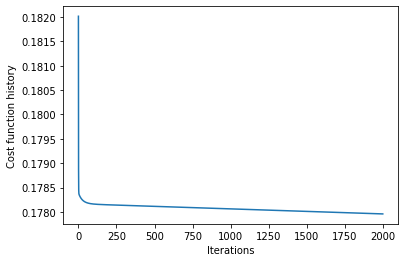

In [168]:
#We will also plot the value of the cost function after each iteration, to see if the value reach a minimum and converge to a
#stabalised value
plt.xlabel('Iterations')
plt.ylabel('Cost function history')
plt.plot(range(2000), J_history)

In [169]:
#As we can see, the model has converged into a constant value, that means our regression model is created sucessfully.
#Let's compare the results with the actual values.
#We will consider our test set and compare our training model values with the the original.

test_X0 = np.ones(len(test_x), dtype = float).reshape(5, 1) #creating the X0 rows on 1s
test = np.append(test_X0, test_x, axis=1).reshape(5, 3) #Creating the final X features array
prediction = sigmoid(test @ theta)
print('The values for each of the test set examples in an array is:\n', prediction)
print('Comparing the original values in our test set:\n', test_y)

The values for each of the test set examples in an array is:
 [[0.66179484]
 [0.64010208]
 [0.69922627]
 [0.63831514]
 [0.68523785]]
Comparing the original values in our test set:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [172]:
#We observe that all our values for answers come above the 0.5 threshold, which means that all our answers our correct.
#Thus, we have created a decision boundary that functions well the model.